In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
loan_data = pd.read_csv('dataset/train.csv')

In [4]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan_data.shape

(614, 13)

In [7]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan_data.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace=True)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [9]:
loan_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
loan_data = loan_data.replace(to_replace='3+', value=4)
loan_data['Dependents'].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

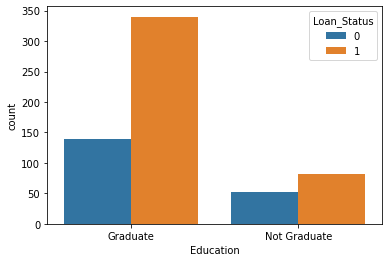

In [11]:
sns.countplot(x='Education', hue='Loan_Status', data=loan_data)

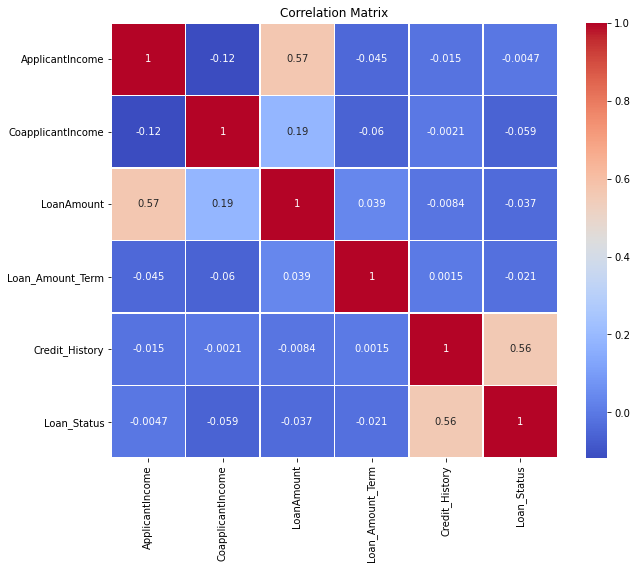

In [12]:
correlation_matrix = loan_data.corr()

plt.figure(figsize=(10, 8))  # Set the size of your plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [13]:
#Replacing categorical values in to numbers
loan_data.replace({'Education':{'Graduate':1, 'Not Graduate':0}, 'Married':{'No':0, 'Yes':1}, 'Gender':{'Male':1, 'Female':0}, 'Self_Employed':{'No':0, 'Yes':1, }, 'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}}, inplace=True)

In [14]:

loan_data.fillna(0, inplace=True)

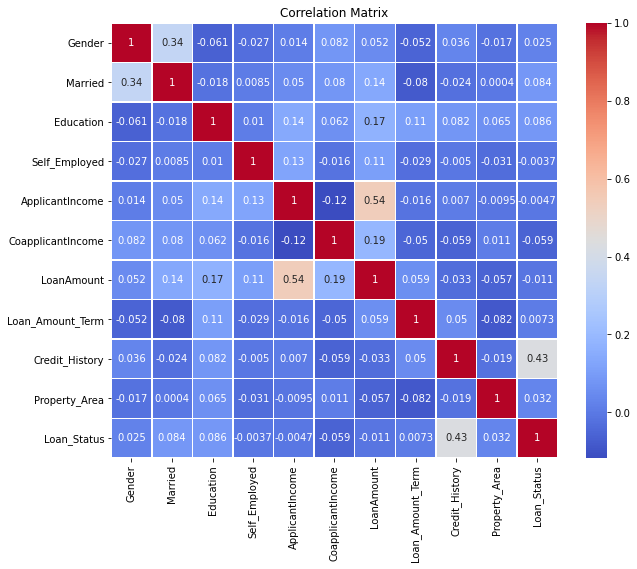

In [20]:
loan_data.head()
correlation_matrix = loan_data.corr()

plt.figure(figsize=(10, 8))  # Set the size of your plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [16]:
#Separating data and labels

data = loan_data.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
labels =loan_data['Loan_Status']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, stratify=labels, random_state=8)

In [18]:
#Training SVM

model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [19]:
training_pred = model.predict(x_train)
training_accuracy = accuracy_score(training_pred, y_train)

test_pred = model.predict(x_test)
test_accuracy = accuracy_score(test_pred, y_test)

print('Training Accuracy: ', training_accuracy)
print('Testing Accuracy: ', test_accuracy)

Training Accuracy:  0.7626811594202898
Testing Accuracy:  0.7096774193548387
